## Resultados

In [2]:
import warnings
warnings.filterwarnings('ignore')

import joblib
from utils import *

In [3]:
dataset =  pd.read_csv('..\euthyroid_sick_syndrome\datasets\euthyroid\euthyroid_final_features.csv')
output_label_dataset = dataset['classification']  #1 = sick, 0 = normal
dataset = dataset[['age', 'sex', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)  

## Modelos: 
1. Logistic Regression
2. Random Forest
3. Xgboost
4. LightGBM



In [8]:
model_random_forest = joblib.load('..\euthyroid_sick_syndrome\models_file\RandomForestClassifier.sav')
model_logistic = joblib.load('..\euthyroid_sick_syndrome\models_file\LogisticRegression.sav')
# adicionar xgboost
model_light = joblib.load('..\euthyroid_sick_syndrome\models_file\LightGBMClassifier.sav')

In [9]:
output_model_random = model_random_forest.predict(input_test)
output_model_logistic = model_logistic.predict(input_test)
output_model_light = model_light.predict(input_test)

## Métricas para o modelo Random Forest

In [5]:
accuracy(output_test, output_model_random)
precision(output_test, output_model_random) 
recall(output_test, output_model_random) 
f1(output_test, output_model_random)


A acurácia é de:  0.9834494773519163
A precisão é de:  0.9838998211091234
A pontuação de recall é de:  0.9821428571428571
A pontuação de F1 é de:  0.9830205540661303


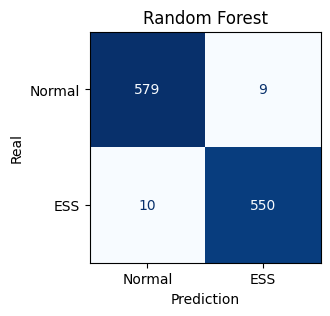

In [6]:
fig = plot_confusion_matrix(output_test, output_model_random, model_random_forest, "Random Forest", labelx='Prediction', labely='Real', display_labels=['Normal', 'ESS'])
#fig.figure_.savefig('confusion_matrix_random.png', dpi=300, bbox_inches='tight')

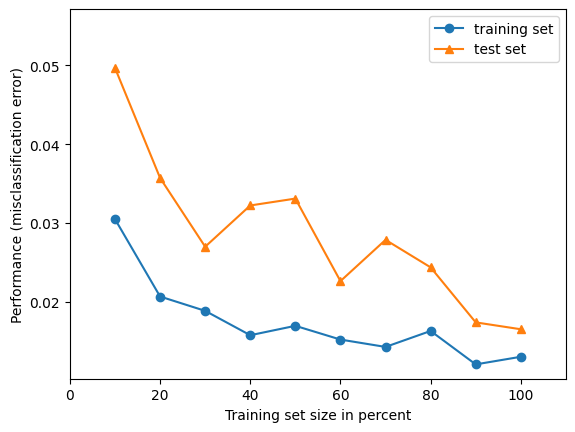

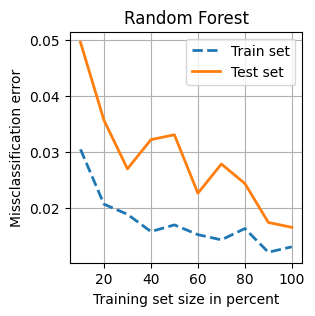

In [9]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_random_forest, title='Random Forest', labelx='Training set size in percent', labely='Missclassification error', label1='Train set', label2='Test set')
#fig.savefig('error_random.png', dpi=300, bbox_inches='tight')

## Métricas para o modelo LightGBM

In [10]:
accuracy(output_test, output_model_light)
precision(output_test, output_model_light) 
recall(output_test, output_model_light) 
f1(output_test, output_model_light)


A acurácia é de:  0.9764808362369338
A precisão é de:  0.9784560143626571
A pontuação de recall é de:  0.9732142857142857
A pontuação de F1 é de:  0.9758281110116382


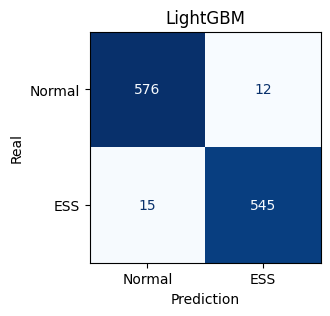

In [11]:
fig = plot_confusion_matrix(output_test, output_model_light, model_light, "LightGBM", labelx='Prediction', labely='Real', display_labels=['Normal', 'ESS'])

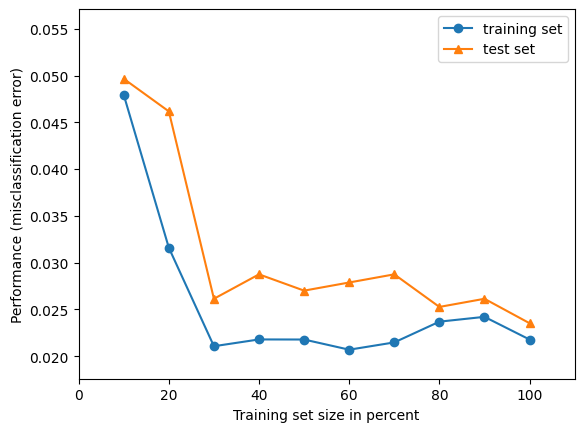

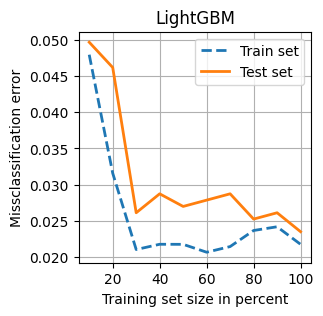

In [12]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_light, title='LightGBM', labelx='Training set size in percent', labely='Missclassification error', label1='Train set', label2='Test set')

## Métricas para o modelo Logistic Regression

In [13]:
accuracy(output_test, output_model_logistic)
precision(output_test, output_model_logistic) 
recall(output_test, output_model_logistic) 
f1(output_test, output_model_logistic)


A acurácia é de:  0.9198606271777003
A precisão é de:  0.90625
A pontuação de recall é de:  0.9321428571428572
A pontuação de F1 é de:  0.9190140845070423


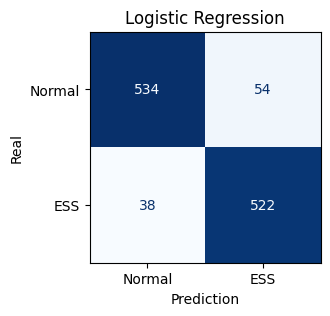

In [14]:
fig = plot_confusion_matrix(output_test, output_model_logistic, model_logistic, "Logistic Regression", labelx='Prediction', labely='Real', display_labels=['Normal', 'ESS'])

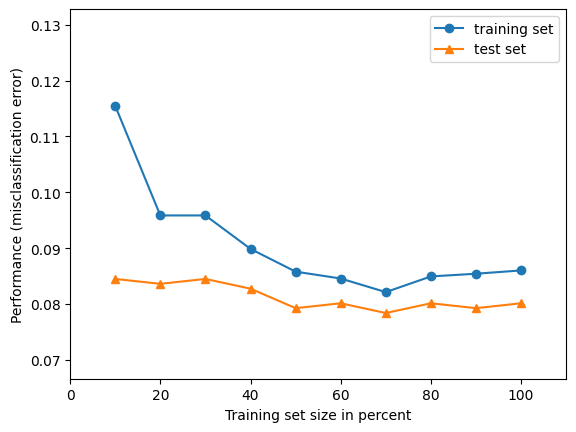

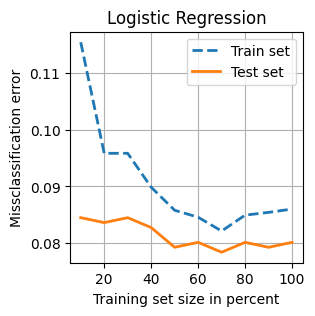

In [15]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_logistic, title='Logistic Regression', labelx='Training set size in percent', labely='Missclassification error', label1='Train set', label2='Test set')